# Team Zip-G-Force Data Filters
## Post processing for acceleration data

1. Import data analysis libraries
2. Import and store the data as “RAW DATA”
 - head_raw_df
 - neck_raw_df
 - shoulder_raw_df
 - heart_raw_df
 - com_raw_df
3. Run the data through an anti-aliasing filter (F2137 qualified)
4. Store the aliased data as “RAW DATA-ALIASED”
 - head_aaflt_df
 - neck_aaflt_df
 - shoulder_aaflt_df
 - heart_aaflt_df
 - com_aaflt_df
5. Run the aliased data through a post processing filter
 - The F2137 filter is a butterworth 4 pole
 - There are other options built currently (Chebyshev, elliptical) in matlab that will be run as well
6. Store the post processed data as “PROCESSED DATA”
 - head_pp_df
 - neck_pp_df
 - shoulder_pp_df
 - heart_pp_df
 - com_pp_df
7. Display post-processed data as a set of graphs
 - Show max and min STD


### Import Libraries

In [1]:
#Imports
import pandas as pd
import numpy as np
import glob, os

#For filtering and plotting graphs
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from scipy.signal import butter, lfilter, freqz

#Create random data with numpy
from math import pi

In [14]:
#Static Variables
colnames_HAM_IMU = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'T',
            'Date Time'] 

colnames_HAM_IMU_ALT = ['Time',
            'Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz', 
            'Mx', 'My', 'Mz', 'P', 'T',
            'Date Time'] 

files = glob.glob('DATA-*')

#Filepaths
ttea_v1_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/1 - Head/'
ttea_v1_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/2 - Neck C7/'
ttea_v1_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/3 - Left Shoulder/'
ttea_v1_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/4 - Heart/'
ttea_v1_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/5 - COM Harness/'

bmfp_v2_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/1 - Head/'
bmfp_v2_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/2 - Neck C7/'
bmfp_v2_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/3 - Left Shoulder/'
bmfp_v2_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/4 - Heart/'
bmfp_v2_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061918 - Blue Mountain/Accelerations/5 - COM Harness/'

bmfp_v3_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/1 - Head/'
bmfp_v3_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/2 - Neck C7/'
bmfp_v3_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/3 - Left Shoulder/'
bmfp_v3_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/4 - Heart/'
bmfp_v3_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062018 - Blue Mountain/Accelerations/5 - COM Harness/'

bmfp_v4_head = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/1 - Head/'
bmfp_v4_neck = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/2 - Neck C7/'
bmfp_v4_shoulder = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/3 - Left Shoulder/'
bmfp_v4_heart = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/4 - Heart/'
bmfp_v4_com = '/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/062118 - Blue Mountain/Accelerations/5 - COM Harness/'

#For debugging purposes - Checkpoint
#Check is file path exists. In the following code, you will need to substitute the correspoding file path. 
os.path.exists('/Users/shellyginelle/Data/1 - Head/DATA-001.csv')
os.path.exists('/Users/shellyginelle/Documents/GitHub/zipline-acceleration-analysis/061518 - Treetop Eco Adventure/Accelerations/1 - Head/DATA-001.csv')

True

### Import Data
Every .CSV file records for 15 mins. The idea is to concatenate all .CSV files for each specific accelerometer positions then chop the sections into set of events: 
1. On Zip Line
 - Start
 - Arrival at Brake Mechanism
2. Offloading - Figure out the time it took for you to get back onto the Zip Line of choice

In [31]:
'''
1. Read all HEAD data files
'''
head_raw_dir = os.chdir(bmfp_v4_head)
head_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    head_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    head_results = head_results.append(head_df)

#Save the results into a separate combined .csv
head_results.to_csv(bmfp_v4_head + 'COMBINED_HEAD_DATA.csv')

#Read combined data, rename columns and print data
head_raw_df = pd.read_csv(bmfp_v4_head + 'COMBINED_HEAD_DATA.csv', 
                         skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#head_raw_df

In [32]:
'''
2. Read all NECK C7 data files
'''
neck_raw_dir = os.chdir(bmfp_v4_neck)
neck_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    neck_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    neck_results = neck_results.append(neck_df)

#Save the results into a separate combined .csv
neck_results.to_csv(bmfp_v4_neck + 'COMBINED_NECK_DATA.csv')

#Read combined data, rename columns and print data
neck_raw_df = pd.read_csv(bmfp_v4_neck + 'COMBINED_NECK_DATA.csv', 
                  skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#neck_raw_df

In [33]:
'''
3. Read all SHOULDER data files
'''
shoulder_raw_dir = os.chdir(bmfp_v4_shoulder)
shoulder_results = pd.DataFrame([], columns=colnames_HAM_IMU_ALT)

for counter, file in enumerate(files):
    shoulder_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7,8], sep=',', names=colnames_HAM_IMU_ALT, engine='python')
    #Append the results into one dataframe
    shoulder_results = shoulder_results.append(shoulder_df)

#Save the results into a separate combined .csv
shoulder_results.to_csv(bmfp_v4_shoulder + 'COMBINED_SHOULDER_DATA.csv')

#Read combined data, rename columns and print data
shoulder_raw_df = pd.read_csv(bmfp_v4_shoulder + 'COMBINED_SHOULDER_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU_ALT, header=None, engine='python')

#print combined dataframe
#shoulder_raw_df

In [36]:
'''
4. Read all HEART data files
'''
heart_raw_dir = os.chdir(bmfp_v4_heart)
heart_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    heart_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7,8], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    heart_results = heart_results.append(heart_df)

#Save the results into a separate combined .csv
heart_results.to_csv(bmfp_v4_heart + 'COMBINED_HEART_DATA.csv')

#Read combined data, rename columns and print data
heart_raw_df = pd.read_csv(bmfp_v4_heart + 'COMBINED_HEART_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#heart_raw_df

In [38]:
'''
5. Read all COM Harness data files
'''
com_raw_dir = os.chdir(bmfp_v4_com)
com_results = pd.DataFrame([], columns=colnames_HAM_IMU)

for counter, file in enumerate(files):
    com_df = pd.read_csv(file, skiprows=[0,1,2,3,4,5,6,7], sep=',', names=colnames_HAM_IMU, engine='python')
    #Append the results into one dataframe
    com_results = com_results.append(com_df)

#Save the results into a separate combined .csv
com_results.to_csv(bmfp_v4_com + 'COMBINED_COM_DATA.csv')

#Read combined data, rename columns and print data
com_raw_df = pd.read_csv(bmfp_v4_com + 'COMBINED_COM_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#print combined dataframe
#com_raw_df

### Manipulate Data

In [39]:
#Divide columns Ax, Ay, Az by 2048
#Divide Gx, Gy, Gz by 65.536
acceleration_cols = ['Ax', 'Ay', 'Az']
gyroscope_cols = ['Gx', 'Gy', 'Gz']
count_g = 2048
degree_sec = 65.536

for a_cols in acceleration_cols:
    
    if (head_raw_df[a_cols].dtype == np.int64 
        and neck_raw_df[a_cols].dtype == np.int64 
        and shoulder_raw_df[a_cols].dtype == np.int64 
        and heart_raw_df[a_cols].dtype == np.int64
        and com_raw_df[a_cols].dtype == np.int64):
        
        head_raw_df[a_cols] = head_raw_df[a_cols].divide(count_g)
        neck_raw_df[a_cols] = neck_raw_df[a_cols].divide(count_g)
        shoulder_raw_df[a_cols] = shoulder_raw_df[a_cols].divide(count_g)
        heart_raw_df[a_cols] = heart_raw_df[a_cols].divide(count_g)
        com_raw_df[a_cols] = com_raw_df[a_cols].divide(count_g)   

for g_cols in gyroscope_cols:
    if (head_raw_df[g_cols].dtype == np.int64 
        and neck_raw_df[g_cols].dtype == np.int64 
        and shoulder_raw_df[g_cols].dtype == np.int64 
        and heart_raw_df[g_cols].dtype == np.int64
        and com_raw_df[g_cols].dtype == np.int64):
        
        head_raw_df[g_cols] = head_raw_df[g_cols].divide(degree_sec)
        neck_raw_df[g_cols] = neck_raw_df[g_cols].divide(degree_sec)
        shoulder_raw_df[g_cols] = shoulder_raw_df[g_cols].divide(degree_sec)
        heart_raw_df[g_cols] = heart_raw_df[g_cols].divide(degree_sec)
        com_raw_df[g_cols] = com_raw_df[g_cols].divide(degree_sec)

In [40]:
#Save dataframe into new .csv
head_raw_df.to_csv('/Users/shellyginelle/Data/1 - Head/MANIPULATED_HEAD_DATA.csv')
head_mnptd_df = pd.read_csv('/Users/shellyginelle/Data/1 - Head/MANIPULATED_HEAD_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

neck_raw_df.to_csv('/Users/shellyginelle/Data/2 - Neck C7/MANIPULATED_NECK_DATA.csv')
neck_mnptd_df = pd.read_csv('/Users/shellyginelle/Data/2 - Neck C7/MANIPULATED_NECK_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

shoulder_raw_df.to_csv('/Users/shellyginelle/Data/3 - Left Shoulder/MANIPULATED_SHOULDER_DATA.csv')
shoulder_mnptd_df = pd.read_csv('/Users/shellyginelle/Data/3 - Left Shoulder/MANIPULATED_SHOULDER_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

heart_raw_df.to_csv('/Users/shellyginelle/Data/4 - Heart/MANIPULATED_HEART_DATA.csv')
heart_mnptd_df = pd.read_csv('/Users/shellyginelle/Data/4 - Heart/MANIPULATED_HEART_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

com_raw_df.to_csv('/Users/shellyginelle/Data/5 - COM Harness/MANIPULATED_COM_DATA.csv')
com_mnptd_df = pd.read_csv('/Users/shellyginelle/Data/5 - COM Harness/MANIPULATED_COM_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

com_mnptd_df

,Time,Ax,Ay,Az,Gx,Gy,Gz,Qw,Qx,Qy,Qz,Mx,My,Mz,T,Date Time
0,0.009857,301.0,2071.0,-255.0,-81.0,7.0,26.0,14827.342,-880.413,-6913.505,-117.002,-208.0,-120.0,-282.0,22314.0,2007-01-06 22:02:31.453
1,0.029845999999999998,227.0,2106.0,-327.0,-67.0,8.0,16.0,14819.728,-882.728,-6929.572,-113.610,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.473
2,0.049865,235.0,2090.0,-306.0,-45.0,-2.0,15.0,14814.669,-884.898,-6940.134,-111.812,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.493
3,0.069885,256.0,2046.0,-298.0,-8.0,-5.0,8.0,14811.772,-886.023,-6946.183,-111.156,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.513
4,0.089874,272.0,2003.0,-244.0,2.0,-2.0,3.0,14808.353,-886.825,-6953.348,-112.272,-215.0,-113.0,-278.0,NaN,2007-01-06 22:02:31.533
5,0.109893,311.0,1983.0,-240.0,-7.0,-2.0,-10.0,14803.629,-887.645,-6963.282,-113.147,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.553
6,0.129882,332.0,2061.0,-268.0,-23.0,1.0,-7.0,14797.021,-888.619,-6977.194,-112.785,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.573
7,0.149902,291.0,2023.0,-284.0,-46.0,-1.0,-4.0,14790.556,-888.520,-6990.899,-112.965,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.593
8,0.169922,279.0,2038.0,-265.0,-35.0,4.0,-10.0,14784.786,-888.915,-7003.068,-111.325,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.613
9,0.18988,307.0,2026.0,-266.0,-27.0,8.0,11.0,14780.071,-888.890,-7013.085,-107.030,-213.0,-113.0,-276.0,NaN,2007-01-06 22:02:31.633


### Filter Data

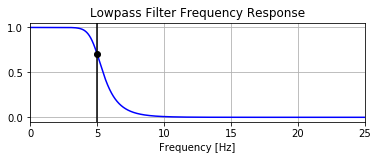

In [41]:
#Run the aliased data through a post processing butterworth filter, save results as post processed data - pp
'''
head_pp_df
neck_pp_df
shoulder_pp_df
heart_pp_df
com_pp_df
'''

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs #The Nyquist frequency is half the sampling rate.
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 50.0       # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

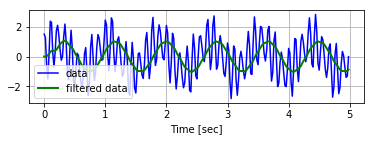

In [42]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [43]:
# The data to be filtered is as follows:
'''
head_mnptd_df
neck_mnptd_df
shoulder_mnptd_df
heart_mnptd_df
com_mnptd_df
'''

cols_to_filter = ['Ax', 'Ay', 'Az', 
            'Gx', 'Gy', 'Gz', 
            'Qw', 'Qx', 'Qy', 'Qz'] 

# Filter the data, and plot both the original and filtered signals.
for cols in cols_to_filter:
    head_mnptd_df[cols] = butter_lowpass_filter(head_mnptd_df[cols], cutoff, fs, order)
    neck_mnptd_df[cols] = butter_lowpass_filter(neck_mnptd_df[cols], cutoff, fs, order)
    shoulder_mnptd_df[cols] = butter_lowpass_filter(shoulder_mnptd_df[cols], cutoff, fs, order)
    heart_mnptd_df[cols] = butter_lowpass_filter(heart_mnptd_df[cols], cutoff, fs, order)
    com_mnptd_df[cols] = butter_lowpass_filter(com_mnptd_df[cols], cutoff, fs, order)

In [44]:
#Save dataframe into new .csv
head_mnptd_df.to_csv('/Users/shellyginelle/Data/1 - Head/BUTTERWORTH_FLTR_HEAD_DATA.csv')
head_butterflt_df = pd.read_csv('/Users/shellyginelle/Data/1 - Head/BUTTERWORTH_FLTR_HEAD_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

neck_mnptd_df.to_csv('/Users/shellyginelle/Data/2 - Neck C7/BUTTERWORTH_FLTR_NECK_DATA.csv')
neck_butterflt_df = pd.read_csv('/Users/shellyginelle/Data/2 - Neck C7/BUTTERWORTH_FLTR_NECK_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

shoulder_mnptd_df.to_csv('/Users/shellyginelle/Data/3 - Left Shoulder/BUTTERWORTH_FLTR_SHOULDER_DATA.csv')
shoulder_butterflt_df = pd.read_csv('/Users/shellyginelle/Data/3 - Left Shoulder/BUTTERWORTH_FLTR_SHOULDER_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

heart_mnptd_df.to_csv('/Users/shellyginelle/Data/4 - Heart/BUTTERWORTH_FLTR_HEART_DATA.csv')
heart_butterflt_df = pd.read_csv('/Users/shellyginelle/Data/4 - Heart/BUTTERWORTH_FLTR_HEART_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

com_mnptd_df.to_csv('/Users/shellyginelle/Data/5 - COM Harness/BUTTERWORTH_FLTR_COM_DATA.csv')
com_butterflt_df = pd.read_csv('/Users/shellyginelle/Data/5 - COM Harness/BUTTERWORTH_FLTR_COM_DATA.csv', 
                 skiprows=[0], sep=',', names=colnames_HAM_IMU, header=None, engine='python')

#For debugging purposes - Checkpoint
#Print last dataframe to show code has completed
com_butterflt_df

,Time,Ax,Ay,Az,Gx,Gy,Gz,Qw,Qx,Qy,Qz,Mx,My,Mz,T,Date Time
0,0.009857,0.102502,0.705253,-0.086837,-0.027584,0.002384,0.008854,5.049268,-0.299814,-2.354309,-0.039844,-208.0,-120.0,-282.0,22314.0,2007-01-06 22:02:31.453
1,0.029845999999999998,1.059212,7.473102,-0.943206,-0.287051,0.025559,0.090265,53.415811,-3.172649,-24.912727,-0.420368,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.473
2,0.049865,5.292722,38.352246,-4.959659,-1.437367,0.129420,0.443604,273.690314,-16.261903,-127.687924,-2.147077,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.493
3,0.069885,17.237092,128.323181,-16.980454,-4.646182,0.413207,1.413220,914.465227,-54.359237,-426.796461,-7.147953,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.513
4,0.089874,41.649103,318.085622,-42.963839,-10.968277,0.936713,3.309894,2264.659264,-134.691496,-1057.414855,-17.630465,-215.0,-113.0,-278.0,NaN,2007-01-06 22:02:31.533
5,0.109893,80.559258,628.900172,-86.379627,-20.252910,1.605594,6.111814,4476.830261,-266.426810,-2091.365952,-34.701762,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.553
6,0.129882,131.266217,1041.148041,-144.675347,-30.523436,2.149274,9.270459,7418.031246,-441.781564,-3467.352241,-57.245688,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.573
7,0.149902,186.932598,1493.351898,-208.653502,-38.591845,2.253725,11.794497,10662.578226,-635.535648,-4987.294832,-81.928897,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.593
8,0.169922,239.189858,1903.275341,-265.619861,-41.683898,1.758344,12.615418,13635.350093,-813.502453,-6383.001156,-104.352907,NaN,NaN,NaN,NaN,2007-01-06 22:02:31.613
9,0.18988,280.976268,2198.934063,-304.557628,-39.011506,0.774117,11.075801,15823.454922,-945.097012,-7414.927971,-120.676680,-213.0,-113.0,-276.0,NaN,2007-01-06 22:02:31.633


#### This part will be added through Tableau Data Visualization

### Plot Data
1. Acceleration
2. G-Force
3. Quaternion

### Data Analysis

#### Acceleration & Gyroscope
1. MAX vs MIN experienced
2. Dependent on the MAX and MIN recorded, what was the longest duration of that acceleration experienced?

#### Quarternion
1. What was the position of the test participant? This will should be mapped to the acceleration experienced.